In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
#import math 
from pandas.plotting import table
import random
#from itertools import accumulate
import statsmodels.api as sm
# import seaborn as sns
from pandas_datareader.data import DataReader
from regression_output import rd2 as rd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from tkinter import Label, Button, Entry, OptionMenu, StringVar
import tkinter as tk
from tkinter import ttk
import matplotlib.animation as animation

import matplotlib

from pandas.plotting import register_matplotlib_converters, deregister_matplotlib_converters
register_matplotlib_converters()

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.pyplot import figure as Figure
import matplotlib.pyplot as plt

C:\Users\tytea\OneDrive - Vizio\Documents\Python\marketdata-master\regression_output.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd2['Price'][rd2['Price'] == inf] = np.nan


              Price  PriceChange  PriceDownFlag
1         62.062500  -148.960807              1
2        114.319626    52.257126              0
3        167.936884    53.617257              0
4        300.000000   132.063116              0
5        287.461538   -12.538462              1
...             ...          ...            ...
129115   728.765957    28.765957              0
129116   848.000000   119.234043              0
129117  1798.000000   950.000000              0
129118  2264.666667   466.666667              0
129119   430.000000 -1834.666667              1

[122456 rows x 3 columns]
AxesSubplot(0.125,0.11;0.775x0.77)


C:\Users\tytea\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [2]:
def regression_formula(X, Y):

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    params = np.append(linear_regressor.intercept_,linear_regressor.coef_)
    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X.reset_index(drop=True)))
    MSE = (sum((Y-Y_pred)**2))/(len(newX)-len(newX.columns))
    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)
    df9 = pd.DataFrame()
    df9["Coefficients"],df9["Standard Errors"],df9["t values"],df9["Probabilites"] = [params,sd_b,ts_b,p_values]
    p_values = np.delete(p_values,0,0)
    coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(linear_regressor.coef_))], axis = 1)
    coefficients.columns = ['variable', 'coefficient']                       
    reg = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose([linear_regressor.intercept_]))], axis = 1)
    reg.columns = ['variable', 'intercept']
    pvalues = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(p_values))], axis = 1)
    pvalues.columns = ['variable', 'pvalue']
    m = pd.merge(coefficients, pvalues)
    union = pd.merge(reg, m)
    result = union.fillna(0)
    result['fm'] = "y={}X+{} p={}".format(round(float(result['coefficient']), 3), round(float(result['intercept']), 3), round(float(result['pvalue']),2))
    result = result['fm'].loc[0]
    
    return result

In [3]:
seg_list = rd['UHD Segment'].unique()
size_list = rd['Size (group)'].unique()
brand_list = rd['Brand'].unique()
res_list = rd['Sub Res'].unique()
outlet_list = rd['Outlet'].unique()



In [13]:
from __future__ import print_function
import matplotlib
import numpy as np

matplotlib.use("TkAgg")

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import matplotlib.animation as animation

import tkinter as tk
from tkinter import ttk

x = np.linspace(0, 2*np.pi, 1024)


class Analysis(tk.Tk):

    
            

    def __init__(self, *args, **kwargs):
#         self._running_anim = None
        tk.Tk.__init__(self, *args, **kwargs)
        tk.Tk.wm_title(self, "Market Analysis")
        
#         Label(self, text="Outlet").grid(row=0,column=0)
#         Label(self, text="Brand").grid(row=0,column=2)
#         Label(self, text="Size").grid(row=0,column=4)
#         Label(self, text="Segment").grid(row=0,column=6)
#         Label(self, text="Resolution").grid(row=0,column=8)
#         Label(self, text="Start Date").grid(row=0,column=10)
#         Label(self, text="End Date").grid(row=0,column=12)
#         Label(self, text="Comp").grid(row=0,column=14)
        
    
        e1 = StringVar(self)
        e1.set("WMT001") # default value
        e2 = StringVar(self)
        e2.set("VIZIO") # default value
        e3 = StringVar(self)
        e3.set(size_list[4]) # default value
        e4 = StringVar(self)
        e4.set(seg_list[2]) # default value
        e5 = StringVar(self)
        e5.set("UHD") # default value
        e6 = Entry(self)
        e6.insert(10,"2017-01-01")
        e7 = Entry(self)
        e7.insert(10,"2019-10-29")
        e8 = StringVar(self)
        e8.set("TCL") # default value


        w1 = ttk.OptionMenu(self, e1, *outlet_list)
        w1.grid(row=0, column=0, sticky='W')
        w2 = ttk.OptionMenu(self, e2, *brand_list)
        w2.grid(row=1, column=0, sticky='W')
        w3 = ttk.OptionMenu(self, e3, *size_list)
        w3.grid(row=2, column=0, sticky='W')
        w4 = ttk.OptionMenu(self, e4, *seg_list)
        w4.grid(row=3, column=0, sticky='W')
        w5 = ttk.OptionMenu(self, e5, *res_list)
        w5.grid(row=4, column=0, sticky='W')
        e6.grid(row=5, column=0, sticky='W')
        e7.grid(row=6, column=0, sticky='W')
        w8 = ttk.OptionMenu(self, e8, *brand_list)
        w8.grid(row=7, column=0, sticky='W')

        
        
        def conversion():

            conversion.outlet = e1.get()
            conversion.brand = e2.get()
            conversion.size = e3.get()
            conversion.segment = e4.get()
            conversion.resolution = e5.get()
            conversion.start_date = datetime.datetime.strptime(e6.get(),'%Y-%m-%d')
            conversion.end_date = datetime.datetime.strptime(e7.get(),'%Y-%m-%d')
            conversion.comp = e8.get()
        
        conversion()
        pages = ((conversion.brand, conversion.size, conversion.segment, conversion.start_date, conversion.end_date, conversion.outlet, conversion.resolution, conversion.outlet))
        
        def ts1():

            plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
            conversion()

            m1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
            m1 = m1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
            m1 = m1.reset_index(['Date'])

            m2 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet)]
            m2 = m2.groupby(['Size (group)', 'UHD Segment', 'Date', 'Outlet'])['Units'].sum()
            m2 = m2.reset_index(['Date'])    

            m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
            m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
            m3 = m3.reset_index(['Date'])  

            m4 = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
            m4 = m4.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
            m4 = m4.reset_index(['Date'])

            g1 = plt.plot(m1['Date'], m1["Units"], label=conversion.brand, color='blue')
            g2 = plt.plot(m2['Date'], m2["Units"], label=conversion.outlet, color='green')
            g3 = plt.plot(m3['Date'], m3["Units"], label=conversion.size, color='red')
            g4 = plt.plot(m4['Date'], m4["Units"], label=conversion.comp, color='purple')
            plt.legend(loc='best', numpoints = 1, prop={'size':10})        
        
        def ploting():
            conversion()

            df2 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
            comp = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]

        #     df2_rollingmean = df2['Units'].rolling(window=4).mean()
        #     df2_rollingstd = df2['Units'].rolling(window=4).std()
            try:
                df3 = df2[np.abs(df2.Productivity-df2.Productivity.mean())<=(3*df2.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
                X = df3[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
                X = X.loc[:,X.isnull().mean() < .5]
                X = X[~np.isnan(X).any(axis=1)]
                Y = X['Productivity']
                X = X.drop('Productivity', axis=1)
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
                regressor = LinearRegression()
                regressor.fit(X_train, y_train)
                linear_regressor = LinearRegression()  # create object for the class
                linear_regressor.fit(X, Y)  # perform linear regression
                Y_pred = linear_regressor.predict(X)  # make predictions
                y_pred2 = regressor.predict(X_test)

                result = regression_formula(X, Y)


            except:
                pass

            try:
                df7 = comp[np.abs(comp.Productivity-comp.Productivity.mean())<=(3*comp.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
                Xx = df7[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
                Xx = Xx.loc[:,Xx.isnull().mean() < .5]
                Xx = Xx[~np.isnan(Xx).any(axis=1)]
                Yy = Xx['Productivity']
                Xx = Xx.drop('Productivity', axis=1)
                Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, Yy, test_size = 0.3, random_state = 0)
                regressor2 = LinearRegression()
                regressor2.fit(Xx_train, yy_train)
                linear_regressor2 = LinearRegression()  # create object for the class
                linear_regressor2.fit(Xx, Yy)  # perform linear regression
                Yy_pred = linear_regressor2.predict(Xx)  # make predictions
                yy_pred2 = regressor2.predict(Xx_test)

                result2 = regression_formula(Xx, Yy)
            except:
                pass

            first = plt.subplot2grid((14,7), (0, 0), rowspan=3, colspan=8)
            first.plot(df3['Date'], df3["Productivity"], label='ST/Loc')
            first.axes.get_xaxis().set_visible(False)
            plt.title('{} {} {} {} ({})  [{} - {}]'.format(e1.get(), e2.get(), e3.get(), e4.get(), e5.get(), e6.get(), e7.get())) 
            plt.legend(loc='upper left', numpoints = 1, prop={'size':7})


            top = plt.subplot2grid((14,7), (3, 0), rowspan=2, colspan=8)
            top.plot(df3['Date'], df3["Price"], label='Price', color='blue')
            plt.legend(loc='best', numpoints = 1, prop={'size':7})


            bottom = plt.subplot2grid((14,7), (7,0), rowspan=1, colspan=8)
            bottom.bar(df2['Week'], df2['PriceDownFlag'])
            plt.title('PriceDown Flag')
            plt.gcf().set_size_inches(10,10)

            try:
                bottom2 = plt.subplot2grid((14,7), (9,0), rowspan=5, colspan=3)
                bottom2.scatter(X, Y)
                plt.title('{}'.format(e2.get()))
                plt.plot(X, Y_pred, color='blue')
                plt.plot(X_test, y_pred2, color='green', linestyle="dotted")
                plt.ylabel('ST/Loc')
                plt.xlabel('Price')
                table(bottom2, np.round(Y.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
                plt.text(X.min(),Y.max(),result)
            except:
                pass

            try:
                bottom3 = plt.subplot2grid((14,7), (9,4), rowspan=5, colspan=3)
                bottom3.scatter(Xx, Yy)
                plt.title('{}'.format(e8.get()))
                plt.plot(Xx, Yy_pred, color='blue')
                plt.plot(Xx_test, yy_pred2, color='green', linestyle="dotted")
                plt.ylabel('ST/Loc')
                plt.xlabel('Price')
                table(bottom3, np.round(Yy.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
                plt.text(Xx.min(),Yy.max(),result2)
            except:
                pass
        
        def ts_forecast():

            plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
            conversion()



        #     m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
        #     m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
        #     m3 = m3.reset_index(['Date'])  

            rd1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
        #     rd1 = rd1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units', 'Dollars'].sum()
        #     rd1 = rd1.reset_index(['Date'])




            md = rd1

            md['Date'] = pd.to_datetime(md['Date'])
            md = md.groupby('Date')['Units', 'Dollars'].sum()
            md = md.reset_index('Date')
            md = md.set_index(['Date'])
            md = md.resample('M').sum()

            md2 = md.reset_index('Date')
            datekeys = md2['Date'].get_values()
            firstdate = datekeys[0]
            lastdate = datekeys[-1]
            md2 = md2[(md2['Date'] != firstdate) & (md2['Date'] != lastdate)]
            md = md2.set_index(['Date'])




            model = pm.auto_arima(md.Units, start_p=1, start_q=1,
                                  test='adf',       # use adftest to find optimal 'd'
                                  max_p=3, max_q=3, # maximum p and q
                                  m=12,              # frequency of series
                                  d=None,           # let model determine 'd'
                                  seasonal=True,   # No Seasonality
                                  start_P=0, 
                                  D=0, 
                                  trace=True,
                                  error_action='ignore',  
                                  suppress_warnings=True, 
                                  stepwise=True)

        #     print(model.summary())
        #     model.plot_diagnostics(figsize=(8,6))
        #     plt.show()
        # Forecast
            n_periods = 24
            fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
            index_of_fc = np.arange(len(md2.Units), len(md2.Units)+n_periods)

            # make series for plotting purpose
            fc_series = pd.Series(fc, index=index_of_fc)
            lower_series = pd.Series(confint[:, 0], index=index_of_fc)
            upper_series = pd.Series(confint[:, 1], index=index_of_fc)

            # Plot
            plt.plot(md2.Units)
            plt.plot(fc_series, color='darkgreen')
            plt.fill_between(lower_series.index, 
                             lower_series, 
                             upper_series, 
                             color='k', alpha=.15)

            plt.title("{} {} ARIMA Forecast".format(conversion.brand, conversion.size))
            plt.show()

        ttk.Button(self, text='TS Forecast', command=ts_forecast).grid(row=0, column=1, sticky='W', pady=3)
        ttk.Button(self, text='Regression', command=ploting).grid(row=1, column=1, sticky='W', pady=3)
        ttk.Button(self, text='TAM', command=ts1).grid(row=2, column=1, sticky='W', pady=3)    
        
        container = tk.Frame(self)
#         container.pack(side="top", fill="both", expand=True)
        container.grid(row=8, column=3)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)
        



        frame = RegressionPlot(conversion.brand, 
                               conversion.size, 
                               conversion.segment, 
                               conversion.start_date, 
                               conversion.end_date, 
                               conversion.outlet, 
                               conversion.resolution,
                               conversion.comp)

        frame.grid(row=8, column=3, sticky="nsew")
    
    def show_frame(self, cont):

        frame = self.frames[cont]
        frame.tkraise()
        frame.canvas.draw_idle()


        
            
            
            



class RegressionPlot(tk.Frame):



    def __init__(self, brand, size, segment, start_date,
                 end_date, outlet, resolution, comp):
#         self._sgn = np.sign(move_dir)
#         self.parent = parent
#         tk.Frame.__init__(self, parent)


#         button1 = ttk.Button(self, text=text,
#                              command=(
#                                  lambda: controller.show_frame(other_key)))
#         button1.grid(row=1, column=0, pady=20, padx=10, sticky='w')

#         # make mpl objects
#         a = Figure(figsize=(4, 4))
#         plot_a = a.add_subplot(111)
#         # set up the axes limits and title
#         plot_a.set_title(my_key)
#         plot_a.set_xlim([0, 2*np.pi])
#         plot_a.set_ylim([-1, 1])
#         # make and stash the plot artist
#         lna, = plot_a.plot([], [], color=color, lw=5)
#         self._line = lna


        df2 = rd[(rd['Brand'] == brand) & (rd['Size (group)'] == size) & (rd['UHD Segment'] == segment) & (rd['Date'] >= start_date) & (rd['Date'] <= end_date) & (rd['Outlet'] == outlet) & (rd['Sub Res'] == resolution)]
        comp = rd[(rd['Brand'] == comp) & (rd['Size (group)'] == size) & (rd['UHD Segment'] == segment) & (rd['Date'] >= start_date) & (rd['Date'] <= end_date) & (rd['Outlet'] == outlet) & (rd['Sub Res'] == resolution)]

    #     df2_rollingmean = df2['Units'].rolling(window=4).mean()
    #     df2_rollingstd = df2['Units'].rolling(window=4).std()
        fig4 = Figure(figsize=(4, 4))
#         fig4 = plt.figure(constrained_layout=True)
        spec4 = fig4.add_gridspec(ncols=2, nrows=2)
        anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                         va='center', ha='center')

        f4_ax1 = fig4.add_subplot(spec4[0, 0])
        f4_ax1.annotate('GridSpec[0, 0]', **anno_opts)
        fig4.add_subplot(spec4[0, 1]).annotate('GridSpec[0, 1:]', **anno_opts)
        fig4.add_subplot(spec4[1, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
        fig4.add_subplot(spec4[1, 1]).annotate('GridSpec[1:, 1:]', **anno_opts)

        # make the canvas to integrate with Tk
        canvasA = FigureCanvasTkAgg(fig4,self)
        canvasA.draw()
        canvasA.get_tk_widget().grid(
            row=1, column=1, pady=20, padx=10, sticky='nsew')

        # stash the canvas so that we can use it above to ensure a re-draw
        # when we switch to this page
        self.canvas = canvasA
        # create and save the animation
        self.anim = animation.FuncAnimation(a, self.update,
                                            interval=100)


    def update(self, i):
        self._line.set_xdata(x)
        self._line.set_ydata(np.sin(x + self._sgn * i * np.pi / 10))
        


        
        



app = Analysis()
app.geometry("800x600")

app.mainloop()
        
        
# root = tk.Tk()
# my_gui = Analysis(root)
# root.mainloop()

AttributeError: 'RegressionPlot' object has no attribute 'tk'

Text(0.5, 0.5, 'GridSpec[1:, 1:]')

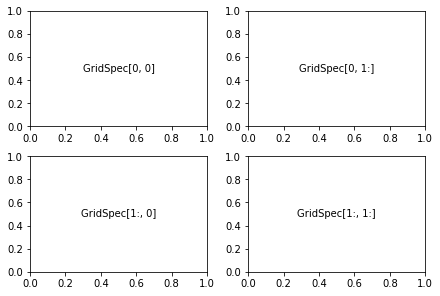

In [11]:
fig4 = plt.figure(constrained_layout=True)
spec4 = fig4.add_gridspec(ncols=2, nrows=2)
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center')

f4_ax1 = fig4.add_subplot(spec4[0, 0])
f4_ax1.annotate('GridSpec[0, 0]', **anno_opts)
fig4.add_subplot(spec4[0, 1]).annotate('GridSpec[0, 1:]', **anno_opts)
fig4.add_subplot(spec4[1, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
fig4.add_subplot(spec4[1, 1]).annotate('GridSpec[1:, 1:]', **anno_opts)

In [4]:
matplotlib.use("TkAgg")




#Functions
def close_window (): 
     master.destroy()

def ts1():

    plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
    conversion()

    m1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    m1 = m1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
    m1 = m1.reset_index(['Date'])
    
    m2 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet)]
    m2 = m2.groupby(['Size (group)', 'UHD Segment', 'Date', 'Outlet'])['Units'].sum()
    m2 = m2.reset_index(['Date'])    
    
    m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
    m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
    m3 = m3.reset_index(['Date'])  
    
    m4 = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    m4 = m4.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
    m4 = m4.reset_index(['Date'])
    
    g1 = plt.plot(m1['Date'], m1["Units"], label=conversion.brand, color='blue')
    g2 = plt.plot(m2['Date'], m2["Units"], label=conversion.outlet, color='green')
    g3 = plt.plot(m3['Date'], m3["Units"], label=conversion.size, color='red')
    g4 = plt.plot(m4['Date'], m4["Units"], label=conversion.comp, color='purple')
    plt.legend(loc='best', numpoints = 1, prop={'size':10})        
        
        
def ts_forecast():

    plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
    conversion()


    
#     m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
#     m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
#     m3 = m3.reset_index(['Date'])  
    
    rd1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
#     rd1 = rd1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units', 'Dollars'].sum()
#     rd1 = rd1.reset_index(['Date'])
    

    

    md = rd1

    md['Date'] = pd.to_datetime(md['Date'])
    md = md.groupby('Date')['Units', 'Dollars'].sum()
    md = md.reset_index('Date')
    md = md.set_index(['Date'])
    md = md.resample('M').sum()

    md2 = md.reset_index('Date')
    datekeys = md2['Date'].get_values()
    firstdate = datekeys[0]
    lastdate = datekeys[-1]
    md2 = md2[(md2['Date'] != firstdate) & (md2['Date'] != lastdate)]
    md = md2.set_index(['Date'])
    



    model = pm.auto_arima(md.Units, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

#     print(model.summary())
#     model.plot_diagnostics(figsize=(8,6))
#     plt.show()
# Forecast
    n_periods = 24
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(md2.Units), len(md2.Units)+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(md2.Units)
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("{} {} ARIMA Forecast".format(conversion.brand, conversion.size))
    plt.show()



def ploting():
    

    
    conversion()

    df2 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    comp = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    
#     df2_rollingmean = df2['Units'].rolling(window=4).mean()
#     df2_rollingstd = df2['Units'].rolling(window=4).std()
    try:
        df3 = df2[np.abs(df2.Productivity-df2.Productivity.mean())<=(3*df2.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
        X = df3[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
        X = X.loc[:,X.isnull().mean() < .5]
        X = X[~np.isnan(X).any(axis=1)]
        Y = X['Productivity']
        X = X.drop('Productivity', axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(X, Y)  # perform linear regression
        Y_pred = linear_regressor.predict(X)  # make predictions
        y_pred2 = regressor.predict(X_test)
        
        result = regression_formula(X, Y)

        
    except:
        pass
    
    try:
        df7 = comp[np.abs(comp.Productivity-comp.Productivity.mean())<=(3*comp.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
        Xx = df7[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
        Xx = Xx.loc[:,Xx.isnull().mean() < .5]
        Xx = Xx[~np.isnan(Xx).any(axis=1)]
        Yy = Xx['Productivity']
        Xx = Xx.drop('Productivity', axis=1)
        Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, Yy, test_size = 0.3, random_state = 0)
        regressor2 = LinearRegression()
        regressor2.fit(Xx_train, yy_train)
        linear_regressor2 = LinearRegression()  # create object for the class
        linear_regressor2.fit(Xx, Yy)  # perform linear regression
        Yy_pred = linear_regressor2.predict(Xx)  # make predictions
        yy_pred2 = regressor2.predict(Xx_test)
        
        result2 = regression_formula(Xx, Yy)
    except:
        pass

    first = plt.subplot2grid((14,7), (0, 0), rowspan=3, colspan=8)
    first.plot(df3['Date'], df3["Productivity"], label='ST/Loc')
    first.axes.get_xaxis().set_visible(False)
    plt.title('{} {} {} {} ({})  [{} - {}]'.format(e1.get(), e2.get(), e3.get(), e4.get(), e5.get(), e6.get(), e7.get())) 
    plt.legend(loc='upper left', numpoints = 1, prop={'size':7})

    
    top = plt.subplot2grid((14,7), (3, 0), rowspan=2, colspan=8)
    top.plot(df3['Date'], df3["Price"], label='Price', color='blue')
    plt.legend(loc='best', numpoints = 1, prop={'size':7})

    
    bottom = plt.subplot2grid((14,7), (7,0), rowspan=1, colspan=8)
    bottom.bar(df2['Week'], df2['PriceDownFlag'])
    plt.title('PriceDown Flag')
    plt.gcf().set_size_inches(10,10)

    try:
        bottom2 = plt.subplot2grid((14,7), (9,0), rowspan=5, colspan=3)
        bottom2.scatter(X, Y)
        plt.title('{}'.format(e2.get()))
        plt.plot(X, Y_pred, color='blue')
        plt.plot(X_test, y_pred2, color='green', linestyle="dotted")
        plt.ylabel('ST/Loc')
        plt.xlabel('Price')
        table(bottom2, np.round(Y.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
        plt.text(X.min(),Y.max(),result)
    except:
        pass
    
    try:
        bottom3 = plt.subplot2grid((14,7), (9,4), rowspan=5, colspan=3)
        bottom3.scatter(Xx, Yy)
        plt.title('{}'.format(e8.get()))
        plt.plot(Xx, Yy_pred, color='blue')
        plt.plot(Xx_test, yy_pred2, color='green', linestyle="dotted")
        plt.ylabel('ST/Loc')
        plt.xlabel('Price')
        table(bottom3, np.round(Yy.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
        plt.text(Xx.min(),Yy.max(),result2)
    except:
        pass


def conversion():

    conversion.outlet = e1.get()
    conversion.brand = e2.get()
    conversion.size = e3.get()
    conversion.segment = e4.get()
    conversion.resolution = e5.get()
    conversion.start_date = datetime.datetime.strptime(e6.get(),'%Y-%m-%d')
    conversion.end_date = datetime.datetime.strptime(e7.get(),'%Y-%m-%d')
    conversion.comp = e8.get()

#-----------------------------------------------------------------------------



master = tk.Tk()
master.title('Market Analysis')
master.geometry('260x260')

Label(master, text="Outlet").grid(row=0)
Label(master, text="Brand").grid(row=1)
Label(master, text="Size").grid(row=2)
Label(master, text="Segment").grid(row=3)
Label(master, text="Resolution").grid(row=4)
Label(master, text="Start Date").grid(row=5)
Label(master, text="End Date").grid(row=6)
Label(master, text="Comp").grid(row=7)

e1 = StringVar(master)
e1.set("WMT001") # default value
e2 = StringVar(master)
e2.set("VIZIO") # default value
e3 = StringVar(master)
e3.set(size_list[4]) # default value
e4 = StringVar(master)
e4.set(seg_list[2]) # default value
e5 = StringVar(master)
e5.set("UHD") # default value
e6 = Entry(master)
e6.insert(10,"2017-01-01")
e7 = Entry(master)
e7.insert(10,"2019-10-29")
e8 = StringVar(master)
e8.set("TCL") # default value


w1 = OptionMenu(master, e1, *outlet_list)
w1.grid(row=0, column=1, sticky='W')
w2 = OptionMenu(master, e2, *brand_list)
w2.grid(row=1, column=1, sticky='W')
w3 = OptionMenu(master, e3, *size_list)
w3.grid(row=2, column=1, sticky='W')
w4 = OptionMenu(master, e4, *seg_list)
w4.grid(row=3, column=1, sticky='W')
w5 = OptionMenu(master, e5, *res_list)
w5.grid(row=4, column=1, sticky='W')
e6.grid(row=5, column=1, sticky='W')
e7.grid(row=6, column=1, sticky='W')
w8 = OptionMenu(master, e8, *brand_list)
w8.grid(row=7, column=1, sticky='W')


Button(master, text='TS Forecast', command=ts_forecast).grid(row=0, column=2, sticky='W', pady=3)
Button(master, text='Regression', command=ploting).grid(row=1, column=2, sticky='W', pady=3)
Button(master, text='TAM', command=ts1).grid(row=2, column=2, sticky='W', pady=3)

master.mainloop()

In [16]:
        fig4 = Figure(figsize=(4, 4))
#         fig4 = plt.figure(constrained_layout=True)
        spec4 = fig4.add_gridspec(ncols=2, nrows=2)
        anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                         va='center', ha='center')

        f4_ax1 = fig4.add_subplot(spec4[0, 0])
        f4_ax1.annotate('GridSpec[0, 0]', **anno_opts)
        fig4.add_subplot(spec4[0, 1]).annotate('GridSpec[0, 1:]', **anno_opts)
        fig4.add_subplot(spec4[1, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
        fig4.add_subplot(spec4[1, 1]).annotate('GridSpec[1:, 1:]', **anno_opts)
        fig4
        # make the canvas to integrate with Tk
#         canvasA = FigureCanvasTkAgg(fig4,self)
#         canvasA.draw()
#         canvasA.get_tk_widget().grid(
#             row=1, column=1, pady=20, padx=10, sticky='nsew')

#         # stash the canvas so that we can use it above to ensure a re-draw
#         # when we switch to this page
#         self.canvas = canvasA
#         # create and save the animation
#         self.anim = animation.FuncAnimation(a, self.update,
#                                             interval=100)


AttributeError: 'NoneType' object has no attribute 'print_figure'

<Figure size 288x288 with 4 Axes>

Text(0.5, 0.5, 'GridSpec[1:, 1:]')

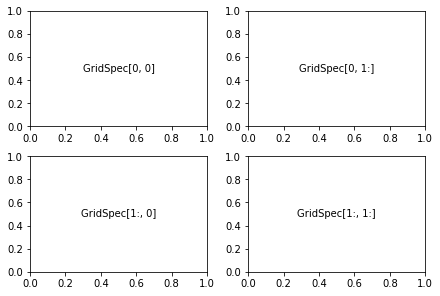

In [18]:
fig4 = plt.figure(constrained_layout=True)
spec4 = fig4.add_gridspec(ncols=2, nrows=2)
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center')

f4_ax1 = fig4.add_subplot(spec4[0, 0])
f4_ax1.annotate('GridSpec[0, 0]', **anno_opts)
fig4.add_subplot(spec4[0, 1]).annotate('GridSpec[0, 1:]', **anno_opts)
fig4.add_subplot(spec4[1, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
fig4.add_subplot(spec4[1, 1]).annotate('GridSpec[1:, 1:]', **anno_opts)

In [4]:
matplotlib.use("TkAgg")




#Functions
def close_window (): 
     master.destroy()

def ts1():

    plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
    conversion()

    m1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    m1 = m1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
    m1 = m1.reset_index(['Date'])
    
    m2 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet)]
    m2 = m2.groupby(['Size (group)', 'UHD Segment', 'Date', 'Outlet'])['Units'].sum()
    m2 = m2.reset_index(['Date'])    
    
    m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
    m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
    m3 = m3.reset_index(['Date'])  
    
    m4 = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    m4 = m4.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
    m4 = m4.reset_index(['Date'])
    
    g1 = plt.plot(m1['Date'], m1["Units"], label=conversion.brand, color='blue')
    g2 = plt.plot(m2['Date'], m2["Units"], label=conversion.outlet, color='green')
    g3 = plt.plot(m3['Date'], m3["Units"], label=conversion.size, color='red')
    g4 = plt.plot(m4['Date'], m4["Units"], label=conversion.comp, color='purple')
    plt.legend(loc='best', numpoints = 1, prop={'size':10})        
        
        
def ts_forecast():

    plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
    conversion()


    
#     m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
#     m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
#     m3 = m3.reset_index(['Date'])  
    
    rd1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
#     rd1 = rd1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units', 'Dollars'].sum()
#     rd1 = rd1.reset_index(['Date'])
    

    

    md = rd1

    md['Date'] = pd.to_datetime(md['Date'])
    md = md.groupby('Date')['Units', 'Dollars'].sum()
    md = md.reset_index('Date')
    md = md.set_index(['Date'])
    md = md.resample('M').sum()

    md2 = md.reset_index('Date')
    datekeys = md2['Date'].get_values()
    firstdate = datekeys[0]
    lastdate = datekeys[-1]
    md2 = md2[(md2['Date'] != firstdate) & (md2['Date'] != lastdate)]
    md = md2.set_index(['Date'])
    



    model = pm.auto_arima(md.Units, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

#     print(model.summary())
#     model.plot_diagnostics(figsize=(8,6))
#     plt.show()
# Forecast
    n_periods = 24
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(md2.Units), len(md2.Units)+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(md2.Units)
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("{} {} ARIMA Forecast".format(conversion.brand, conversion.size))
    plt.show()



def ploting():
    

    
    conversion()

    df2 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    comp = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    
#     df2_rollingmean = df2['Units'].rolling(window=4).mean()
#     df2_rollingstd = df2['Units'].rolling(window=4).std()
    try:
        df3 = df2[np.abs(df2.Productivity-df2.Productivity.mean())<=(3*df2.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
        X = df3[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
        X = X.loc[:,X.isnull().mean() < .5]
        X = X[~np.isnan(X).any(axis=1)]
        Y = X['Productivity']
        X = X.drop('Productivity', axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(X, Y)  # perform linear regression
        Y_pred = linear_regressor.predict(X)  # make predictions
        y_pred2 = regressor.predict(X_test)
        
        result = regression_formula(X, Y)

        
    except:
        pass
    
    try:
        df7 = comp[np.abs(comp.Productivity-comp.Productivity.mean())<=(3*comp.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
        Xx = df7[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
        Xx = Xx.loc[:,Xx.isnull().mean() < .5]
        Xx = Xx[~np.isnan(Xx).any(axis=1)]
        Yy = Xx['Productivity']
        Xx = Xx.drop('Productivity', axis=1)
        Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, Yy, test_size = 0.3, random_state = 0)
        regressor2 = LinearRegression()
        regressor2.fit(Xx_train, yy_train)
        linear_regressor2 = LinearRegression()  # create object for the class
        linear_regressor2.fit(Xx, Yy)  # perform linear regression
        Yy_pred = linear_regressor2.predict(Xx)  # make predictions
        yy_pred2 = regressor2.predict(Xx_test)
        
        result2 = regression_formula(Xx, Yy)
    except:
        pass

    first = plt.subplot2grid((14,7), (0, 0), rowspan=3, colspan=8)
    first.plot(df3['Date'], df3["Productivity"], label='ST/Loc')
    first.axes.get_xaxis().set_visible(False)
    plt.title('{} {} {} {} ({})  [{} - {}]'.format(e1.get(), e2.get(), e3.get(), e4.get(), e5.get(), e6.get(), e7.get())) 
    plt.legend(loc='upper left', numpoints = 1, prop={'size':7})

    
    top = plt.subplot2grid((14,7), (3, 0), rowspan=2, colspan=8)
    top.plot(df3['Date'], df3["Price"], label='Price', color='blue')
    plt.legend(loc='best', numpoints = 1, prop={'size':7})

    
    bottom = plt.subplot2grid((14,7), (7,0), rowspan=1, colspan=8)
    bottom.bar(df2['Week'], df2['PriceDownFlag'])
    plt.title('PriceDown Flag')
    plt.gcf().set_size_inches(10,10)

    try:
        bottom2 = plt.subplot2grid((14,7), (9,0), rowspan=5, colspan=3)
        bottom2.scatter(X, Y)
        plt.title('{}'.format(e2.get()))
        plt.plot(X, Y_pred, color='blue')
        plt.plot(X_test, y_pred2, color='green', linestyle="dotted")
        plt.ylabel('ST/Loc')
        plt.xlabel('Price')
        table(bottom2, np.round(Y.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
        plt.text(X.min(),Y.max(),result)
    except:
        pass
    
    try:
        bottom3 = plt.subplot2grid((14,7), (9,4), rowspan=5, colspan=3)
        bottom3.scatter(Xx, Yy)
        plt.title('{}'.format(e8.get()))
        plt.plot(Xx, Yy_pred, color='blue')
        plt.plot(Xx_test, yy_pred2, color='green', linestyle="dotted")
        plt.ylabel('ST/Loc')
        plt.xlabel('Price')
        table(bottom3, np.round(Yy.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
        plt.text(Xx.min(),Yy.max(),result2)
    except:
        pass


def conversion():

    conversion.outlet = e1.get()
    conversion.brand = e2.get()
    conversion.size = e3.get()
    conversion.segment = e4.get()
    conversion.resolution = e5.get()
    conversion.start_date = datetime.datetime.strptime(e6.get(),'%Y-%m-%d')
    conversion.end_date = datetime.datetime.strptime(e7.get(),'%Y-%m-%d')
    conversion.comp = e8.get()

#-----------------------------------------------------------------------------



master = tk.Tk()
master.title('Market Analysis')
master.geometry('260x260')

Label(master, text="Outlet").grid(row=0)
Label(master, text="Brand").grid(row=1)
Label(master, text="Size").grid(row=2)
Label(master, text="Segment").grid(row=3)
Label(master, text="Resolution").grid(row=4)
Label(master, text="Start Date").grid(row=5)
Label(master, text="End Date").grid(row=6)
Label(master, text="Comp").grid(row=7)

e1 = StringVar(master)
e1.set("WMT001") # default value
e2 = StringVar(master)
e2.set("VIZIO") # default value
e3 = StringVar(master)
e3.set(size_list[4]) # default value
e4 = StringVar(master)
e4.set(seg_list[2]) # default value
e5 = StringVar(master)
e5.set("UHD") # default value
e6 = Entry(master)
e6.insert(10,"2017-01-01")
e7 = Entry(master)
e7.insert(10,"2019-10-29")
e8 = StringVar(master)
e8.set("TCL") # default value


w1 = OptionMenu(master, e1, *outlet_list)
w1.grid(row=0, column=1, sticky='W')
w2 = OptionMenu(master, e2, *brand_list)
w2.grid(row=1, column=1, sticky='W')
w3 = OptionMenu(master, e3, *size_list)
w3.grid(row=2, column=1, sticky='W')
w4 = OptionMenu(master, e4, *seg_list)
w4.grid(row=3, column=1, sticky='W')
w5 = OptionMenu(master, e5, *res_list)
w5.grid(row=4, column=1, sticky='W')
e6.grid(row=5, column=1, sticky='W')
e7.grid(row=6, column=1, sticky='W')
w8 = OptionMenu(master, e8, *brand_list)
w8.grid(row=7, column=1, sticky='W')


Button(master, text='TS Forecast', command=ts_forecast).grid(row=0, column=2, sticky='W', pady=3)
Button(master, text='Regression', command=ploting).grid(row=1, column=2, sticky='W', pady=3)
Button(master, text='TAM', command=ts1).grid(row=2, column=2, sticky='W', pady=3)

master.mainloop()

In [4]:
matplotlib.use("TkAgg")




#Functions
def close_window (): 
     master.destroy()

def ts1():

    plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
    conversion()

    m1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    m1 = m1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
    m1 = m1.reset_index(['Date'])
    
    m2 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet)]
    m2 = m2.groupby(['Size (group)', 'UHD Segment', 'Date', 'Outlet'])['Units'].sum()
    m2 = m2.reset_index(['Date'])    
    
    m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
    m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
    m3 = m3.reset_index(['Date'])  
    
    m4 = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    m4 = m4.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units'].sum()
    m4 = m4.reset_index(['Date'])
    
    g1 = plt.plot(m1['Date'], m1["Units"], label=conversion.brand, color='blue')
    g2 = plt.plot(m2['Date'], m2["Units"], label=conversion.outlet, color='green')
    g3 = plt.plot(m3['Date'], m3["Units"], label=conversion.size, color='red')
    g4 = plt.plot(m4['Date'], m4["Units"], label=conversion.comp, color='purple')
    plt.legend(loc='best', numpoints = 1, prop={'size':10})        
        
        
def ts_forecast():

    plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})
    conversion()


    
#     m3 = rd[(rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date)]
#     m3 = m3.groupby(['Size (group)', 'UHD Segment', 'Date'])['Units'].sum()
#     m3 = m3.reset_index(['Date'])  
    
    rd1 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
#     rd1 = rd1.groupby(['Brand', 'Size (group)', 'UHD Segment', 'Date', 'Outlet', 'Sub Res'])['Units', 'Dollars'].sum()
#     rd1 = rd1.reset_index(['Date'])
    

    

    md = rd1

    md['Date'] = pd.to_datetime(md['Date'])
    md = md.groupby('Date')['Units', 'Dollars'].sum()
    md = md.reset_index('Date')
    md = md.set_index(['Date'])
    md = md.resample('M').sum()

    md2 = md.reset_index('Date')
    datekeys = md2['Date'].get_values()
    firstdate = datekeys[0]
    lastdate = datekeys[-1]
    md2 = md2[(md2['Date'] != firstdate) & (md2['Date'] != lastdate)]
    md = md2.set_index(['Date'])
    



    model = pm.auto_arima(md.Units, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

#     print(model.summary())
#     model.plot_diagnostics(figsize=(8,6))
#     plt.show()
# Forecast
    n_periods = 24
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(md2.Units), len(md2.Units)+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(md2.Units)
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("{} {} ARIMA Forecast".format(conversion.brand, conversion.size))
    plt.show()



def ploting():
    

    
    conversion()

    df2 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    comp = rd[(rd['Brand'] == conversion.comp) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]
    
#     df2_rollingmean = df2['Units'].rolling(window=4).mean()
#     df2_rollingstd = df2['Units'].rolling(window=4).std()
    try:
        df3 = df2[np.abs(df2.Productivity-df2.Productivity.mean())<=(3*df2.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
        X = df3[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
        X = X.loc[:,X.isnull().mean() < .5]
        X = X[~np.isnan(X).any(axis=1)]
        Y = X['Productivity']
        X = X.drop('Productivity', axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(X, Y)  # perform linear regression
        Y_pred = linear_regressor.predict(X)  # make predictions
        y_pred2 = regressor.predict(X_test)
        
        result = regression_formula(X, Y)

        
    except:
        pass
    
    try:
        df7 = comp[np.abs(comp.Productivity-comp.Productivity.mean())<=(3*comp.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
        Xx = df7[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
        Xx = Xx.loc[:,Xx.isnull().mean() < .5]
        Xx = Xx[~np.isnan(Xx).any(axis=1)]
        Yy = Xx['Productivity']
        Xx = Xx.drop('Productivity', axis=1)
        Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, Yy, test_size = 0.3, random_state = 0)
        regressor2 = LinearRegression()
        regressor2.fit(Xx_train, yy_train)
        linear_regressor2 = LinearRegression()  # create object for the class
        linear_regressor2.fit(Xx, Yy)  # perform linear regression
        Yy_pred = linear_regressor2.predict(Xx)  # make predictions
        yy_pred2 = regressor2.predict(Xx_test)
        
        result2 = regression_formula(Xx, Yy)
    except:
        pass

    first = plt.subplot2grid((14,7), (0, 0), rowspan=3, colspan=8)
    first.plot(df3['Date'], df3["Productivity"], label='ST/Loc')
    first.axes.get_xaxis().set_visible(False)
    plt.title('{} {} {} {} ({})  [{} - {}]'.format(e1.get(), e2.get(), e3.get(), e4.get(), e5.get(), e6.get(), e7.get())) 
    plt.legend(loc='upper left', numpoints = 1, prop={'size':7})

    
    top = plt.subplot2grid((14,7), (3, 0), rowspan=2, colspan=8)
    top.plot(df3['Date'], df3["Price"], label='Price', color='blue')
    plt.legend(loc='best', numpoints = 1, prop={'size':7})

    
    bottom = plt.subplot2grid((14,7), (7,0), rowspan=1, colspan=8)
    bottom.bar(df2['Week'], df2['PriceDownFlag'])
    plt.title('PriceDown Flag')
    plt.gcf().set_size_inches(10,10)

    try:
        bottom2 = plt.subplot2grid((14,7), (9,0), rowspan=5, colspan=3)
        bottom2.scatter(X, Y)
        plt.title('{}'.format(e2.get()))
        plt.plot(X, Y_pred, color='blue')
        plt.plot(X_test, y_pred2, color='green', linestyle="dotted")
        plt.ylabel('ST/Loc')
        plt.xlabel('Price')
        table(bottom2, np.round(Y.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
        plt.text(X.min(),Y.max(),result)
    except:
        pass
    
    try:
        bottom3 = plt.subplot2grid((14,7), (9,4), rowspan=5, colspan=3)
        bottom3.scatter(Xx, Yy)
        plt.title('{}'.format(e8.get()))
        plt.plot(Xx, Yy_pred, color='blue')
        plt.plot(Xx_test, yy_pred2, color='green', linestyle="dotted")
        plt.ylabel('ST/Loc')
        plt.xlabel('Price')
        table(bottom3, np.round(Yy.describe(), 1), loc='best', colWidths=[0.2, 0.2, 0.2])
        plt.text(Xx.min(),Yy.max(),result2)
    except:
        pass


def conversion():

    conversion.outlet = e1.get()
    conversion.brand = e2.get()
    conversion.size = e3.get()
    conversion.segment = e4.get()
    conversion.resolution = e5.get()
    conversion.start_date = datetime.datetime.strptime(e6.get(),'%Y-%m-%d')
    conversion.end_date = datetime.datetime.strptime(e7.get(),'%Y-%m-%d')
    conversion.comp = e8.get()

#-----------------------------------------------------------------------------



master = tk.Tk()
master.title('Market Analysis')
master.geometry('260x260')

Label(master, text="Outlet").grid(row=0)
Label(master, text="Brand").grid(row=1)
Label(master, text="Size").grid(row=2)
Label(master, text="Segment").grid(row=3)
Label(master, text="Resolution").grid(row=4)
Label(master, text="Start Date").grid(row=5)
Label(master, text="End Date").grid(row=6)
Label(master, text="Comp").grid(row=7)

e1 = StringVar(master)
e1.set("WMT001") # default value
e2 = StringVar(master)
e2.set("VIZIO") # default value
e3 = StringVar(master)
e3.set(size_list[4]) # default value
e4 = StringVar(master)
e4.set(seg_list[2]) # default value
e5 = StringVar(master)
e5.set("UHD") # default value
e6 = Entry(master)
e6.insert(10,"2017-01-01")
e7 = Entry(master)
e7.insert(10,"2019-10-29")
e8 = StringVar(master)
e8.set("TCL") # default value


w1 = OptionMenu(master, e1, *outlet_list)
w1.grid(row=0, column=1, sticky='W')
w2 = OptionMenu(master, e2, *brand_list)
w2.grid(row=1, column=1, sticky='W')
w3 = OptionMenu(master, e3, *size_list)
w3.grid(row=2, column=1, sticky='W')
w4 = OptionMenu(master, e4, *seg_list)
w4.grid(row=3, column=1, sticky='W')
w5 = OptionMenu(master, e5, *res_list)
w5.grid(row=4, column=1, sticky='W')
e6.grid(row=5, column=1, sticky='W')
e7.grid(row=6, column=1, sticky='W')
w8 = OptionMenu(master, e8, *brand_list)
w8.grid(row=7, column=1, sticky='W')


Button(master, text='TS Forecast', command=ts_forecast).grid(row=0, column=2, sticky='W', pady=3)
Button(master, text='Regression', command=ploting).grid(row=1, column=2, sticky='W', pady=3)
Button(master, text='TAM', command=ts1).grid(row=2, column=2, sticky='W', pady=3)

master.mainloop()

In [15]:
from __future__ import print_function
import matplotlib
import numpy as np

matplotlib.use("TkAgg")

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import matplotlib.animation as animation

import tkinter as tk
from tkinter import ttk

x = np.linspace(0, 2*np.pi, 1024)


class TransientAnalysis(tk.Tk):

    pages = ((1, 'Switch to "-"', '-', '+', 'orange'),
             (-1, 'Switch to "+"', '+', '-', 'olive'))

    def __init__(self, *args, **kwargs):
        self._running_anim = None
        tk.Tk.__init__(self, *args, **kwargs)
        tk.Tk.wm_title(self, "Transient Analysis GUI: v1.0")

        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}

        for (direction, text, other_key, my_key, color) in self.pages:

            frame = MovingSinGraphPage(direction, text, other_key,
                                       my_key, color,
                                       container, self)

            self.frames[my_key] = frame

            frame.grid(row=0, column=0, sticky="nsew")

    def show_frame(self, cont):

        frame = self.frames[cont]
        frame.tkraise()
        frame.canvas.draw_idle()


class MovingSinGraphPage(tk.Frame):

    def __init__(self, move_dir, text, other_key, my_key,
                 color, parent, controller):
        self._sgn = np.sign(move_dir)

        tk.Frame.__init__(self, parent)

        button1 = ttk.Button(self, text=text,
                             command=(
                                 lambda: controller.show_frame(other_key)))
        button1.grid(row=1, column=0, pady=20, padx=10, sticky='w')

        # make mpl objects
        a = Figure(figsize=(4, 4))
        plot_a = a.add_subplot(111)
        # set up the axes limits and title
        plot_a.set_title(my_key)
        plot_a.set_xlim([0, 2*np.pi])
        plot_a.set_ylim([-1, 1])
        # make and stash the plot artist
        lna, = plot_a.plot([], [], color=color, lw=5)
        self._line = lna
        
        
        
        

        # make the canvas to integrate with Tk
        canvasA = FigureCanvasTkAgg(a, self)
        canvasA.draw()
        canvasA.get_tk_widget().grid(
            row=1, column=1, pady=20, padx=10, sticky='nsew')

        # stash the canvas so that we can use it above to ensure a re-draw
        # when we switch to this page
        self.canvas = canvasA
        # create and save the animation
        self.anim = animation.FuncAnimation(a, self.update,
                                            interval=100)

    def update(self, i):
        self._line.set_xdata(x)
        self._line.set_ydata(np.sin(x + self._sgn * i * np.pi / 10))


app = TransientAnalysis()
app.geometry("800x600")

app.mainloop()

In [22]:
class PageThree(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Graph Page!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()
        
        f = Figure(figsize=(5,5), dpi=100)
        a = f.add_subplot(111)
        a.plot([1,2,3,4,5,6,7,8],[5,6,1,3,8,9,3,5])

        

        canvas = FigureCanvasTkAgg(f, self)
        canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2TkAgg(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

In [93]:
import tkinter as tk

class Application(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.pack()
        self.create_widgets()

    def create_widgets(self):
        self.hi_there = tk.Button(self)
        self.hi_there["text"] = "Hello World\n(click me)"
        self.hi_there["command"] = self.say_hi
        self.hi_there.pack(side="top")

        self.quit = tk.Button(self, text="QUIT", fg="red",
                              command=root.destroy)
        self.quit.pack(side="bottom")

    def say_hi(self):
        print("hi there, everyone!")

root = tk.Tk()
app = Application(master=root)
app.mainloop()

hi there, everyone!


In [40]:
md = rd

tp = md['Units'].describe()
print(tp.info())

md['Date'] = pd.to_datetime(md['Date'])
md = md.groupby('Date')['Units', 'Dollars'].sum()
md = md.reset_index('Date')
md = md.set_index(['Date'])
md = md.resample('M').sum()

md2 = md.reset_index('Date')
datekeys = md2['Date'].get_values()
firstdate = datekeys[0]
lastdate = datekeys[-1]
md2 = md2[(md2['Date'] != firstdate) & (md2['Date'] != lastdate)]
md = md2.set_index(['Date'])




model = pm.auto_arima(md.Units, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# print(model.summary())
# model.plot_diagnostics(figsize=(8,6))
# plt.show()
# Forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(md2.Units), len(md2.Units)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot

t1 = plt.subplot2grid((14,7), (0, 0), rowspan=3, colspan=8)
t1.plot(md2.Units, df2["Productivity"], label='ST/Loc')
t1.axes.get_xaxis().set_visible(False)
# plt.title('{} {} {} {} ({})  [{} - {}]'.format(e1.get(), e2.get(), e3.get(), e4.get(), e5.get(), e6.get(), e7.get())) 
plt.legend(loc='upper left', numpoints = 1, prop={'size':7})


# fig, ax = plt.subplots(1, 1)
# table(ax, np.round(md2.Units.describe(), 2), loc='upper right', colWidths=[0.2, 0.2, 0.2])

t1.plot(md2.Units)
plt.plot(fc_series, color='darkgreen')

plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")

plt.show()

AttributeError: 'Series' object has no attribute 'info'

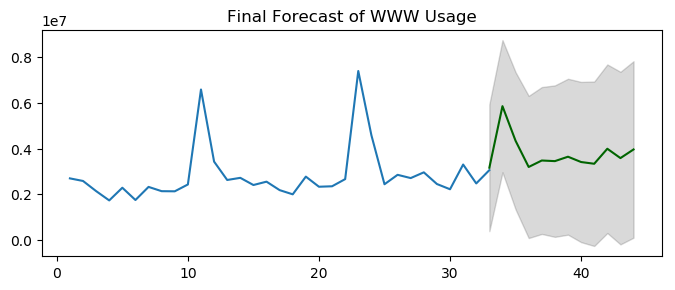

In [21]:
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(md2.Units), len(md2.Units)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(md2.Units)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [47]:
bottom.bar?

Object `bottom.bar` not found.


In [31]:
pm.auto_arima?

Signature:
pm.auto_arima(
    ['y', 'exogenous=None', 'start_p=2', 'd=None', 'start_q=2', 'max_p=5', 'max_d=2', 'max_q=5', 'start_P=1', 'D=None', 'start_Q=1', 'max_P=2', 'max_D=1', 'max_Q=2', 'max_order=10', 'm=1', 'seasonal=True', 'stationary=False', "information_criterion='aic'", 'alpha=0.05', "test='kpss'", "seasonal_test='ocsb'", 'stepwise=True', 'n_jobs=1', 'start_params=None', 'trend=None', 'method=None', 'transparams=True', "solver='lbfgs'", 'maxiter=None', 'disp=0', 'callback=None', 'offset_test_args=None', 'seasonal_test_args=None', 'suppress_warnings=False', "error_action='warn'", 'trace=False', 'random=False', 'random_state=None', 'n_fits=10', 'return_valid_fits=False', 'out_of_sample_size=0', "scoring='mse'", 'scoring_args=None', 'with_intercept=True', 'sarimax_kwargs=None', '**fit_args'],
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling on a singl

In [7]:
plt.bar?

Signature:
plt.bar(
    ['x', 'height', 'width=0.8', 'bottom=None', '*', "align='center'", 'data=None', '**kwargs'],
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The vertical baseline
is *bottom* (default 0).

Each of *x*, *height*, *width*, and *bottom* may either be a scalar
applying to all bars, or it may be a sequence of length N providing a
separate value for each bar.

Parameters
----------
x : sequence of scalars
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : scalar or sequence of scalars
    The height(s) of the bars.

width : scalar or array-like, optional
    The width(s) of the bars (default: 0.8).

bottom : scalar or array-like, optional
    The y coordinate(s) of the bars bases (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'cent

In [39]:
print(X)

x


In [45]:
df2 = rd[(rd['Brand'] == conversion.brand) & (rd['Size (group)'] == conversion.size) & (rd['UHD Segment'] == conversion.segment) & (rd['Date'] >= conversion.start_date) & (rd['Date'] <= conversion.end_date) & (rd['Outlet'] == conversion.outlet) & (rd['Sub Res'] == conversion.resolution)]

df2_rollingmean = df2['Units'].rolling(window=4).mean()
df2_rollingstd = df2['Units'].rolling(window=4).mean()


df3 = df2[np.abs(df2.Productivity-df2.Productivity.mean())<=(3*df2.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'
X = df3[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
X = X.loc[:,X.isnull().mean() < .5]
X = X[~np.isnan(X).any(axis=1)]
Y = X['Productivity']
X = X.drop('Productivity', axis=1)
X = int(X)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'